In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix

In [ ]:
#######classification report

def calculate_metrics(self, y, preds):
        
        ## accuracy is given by
        accuracy = 1-np.sum(np.abs(np.subtract(preds,y)))/len(preds)
        
        ## calculate the True Positives TP
        Tp = np.sum((y == True) & (preds == True))
        
        ## calculate the True Negatives TN
        Tn = np.sum((y == False) & (preds == False))
        
        ## calculate the False Positives FP
        Fp = np.sum((y == False) & (preds == True))
        
        ## calculate the False Negatives FN
        Fn = np.sum((y == True) & (preds == False))
        
        ## calculate the Precision P
        P = Tp/(Tp+Fp)
        
        ## calculate the Recall
        R = Tp/(Tp+Fn)
        
        ## calculate the F1 score
        F = 2/(1/P+1/R)
        
        ## making confusion matrix
        c = np.ones(4)
        c[0],c[1],c[2],c[3] = Tn, Fp, Fn, Tp
        c = c.reshape(2,2)
        
        return accuracy,P,R,F,c


#to check correlation of the features with target in training data
train_df = pd.concat([X_train,y_train],axis=1)
plt.figure(figsize=(12, 8))
corr = train_df.corr()
#to remove least 3 correlated features
least_corr = corr.iloc[:,-1].abs().nsmallest(3).index
X_train = X_train.drop(least_corr, axis=1)
X_test = X_test.drop(least_corr, axis=1)

#Making Violin Plots
std_dev = train_df.std(numeric_only=True).sort_values(ascending=False)[:5]
sns.violinplot(data=train_df[std_dev.index])


#Removing outliers using IQR
Q1 = train_df.quantile(0.25,numeric_only=True)
Q3 = train_df.quantile(0.75,numeric_only=True)
IQR = Q3 - Q1 # difference between the third and first quartiles
train_df = train_df[~((train_df < (Q1 - 1.5 * IQR)) | (train_df > (Q3 + 1.5 * IQR))).any(axis=1)]



In [422]:
df = pd.read_csv('logistic.csv')
df.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
### Function to Split data into Training and Test set

def train_test_split(data):
    # Calculate the split index for 80% of the data
    split_idx = int(len(data) * 0.8)
    
    # Split the data into training and testing sets
    train_data = data[:split_idx]   # First 80% for training
    test_data = data[split_idx:]    # Last 20% for testing
    
    return train_data, test_data

# def splitDataSet(inputDataframe, trainSetSize):
    
#         trainSet = inputDataframe.sample(frac = trainSetSize)
#         testSet = inputDataframe.drop(trainSet.index)
#         return trainSet, testSet
    

### One Hot encoding and Data Splitting

In [423]:

#One hot encoding
df['Y'] = df['Y'].map({'M':'0', 'B':'1'}) 
df['Y'].astype(float)

train_data, test_data = train_test_split(df)

Xtrain = train_data.drop('Y', axis=1)
Ytrain = train_data['Y'].astype(float)
Xtrainn = (Xtrain - Xtrain.mean())/Xtrain.std()


Xtests = test_data.drop('Y', axis=1)
Ytests = test_data['Y'].astype(float)
Xtestss = (Xtests - Xtests.mean())/Xtests.std()

### 1A. Extending the Logistic Regression Class to include Stochastic Gradient Descent Method

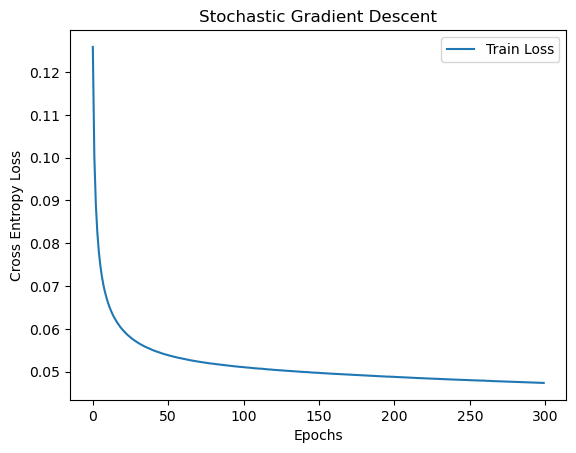

In [424]:
import numpy as np

class Loss:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def mean_square_loss(self, theta):
        predictions = np.dot(self.x, theta)
        return np.mean((self.y - predictions) ** 2)

    def mean_square_gradient(self, theta):
        predictions = np.dot(self.x, theta)
        gradient = -2 * np.dot(self.x.T, (self.y - predictions)) / len(self.y)
        return gradient

    def cross_entropy_loss(self, theta):
        predictions = self.sigmoid(np.dot(self.x, theta))
        return -np.mean(self.y * np.log(predictions) + (1 - self.y) * np.log(1 - predictions))

    def cross_entropy_gradient(self, theta):
        predictions = self.sigmoid(np.dot(self.x, theta))
        gradient = np.dot(self.x.T, (predictions - self.y)) / len(self.y)
        return gradient

    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))


class Optimization:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.loss_obj = Loss(x, y)

    def mean_square_hessian(self):
        return 2 * np.dot(self.x.T, self.x) / len(self.x)

    def cross_entropy_hessian(self, theta):
        p = self.sigmoid(np.dot(self.x, theta))
        W = np.diag(p * (1 - p))
        hess = np.dot(self.x.T, np.dot(W, self.x))
        return hess

    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    def newtons_method(self, theta, lr=0.01, epochs=50, loss_trajectory=None):
        for epoch in range(epochs):
            gradient = self.loss_obj.cross_entropy_gradient(theta)
            hessian = self.cross_entropy_hessian(theta)
            inv_hessian = np.linalg.inv(hessian)
            theta -= lr * np.dot(inv_hessian, gradient)

            # Calculate loss for monitoring
            loss = self.loss_obj.cross_entropy_loss(theta)
            loss_trajectory.append(loss)
        return theta

    def sgd(self, theta, lr=0.01, epochs=50, batch_size=20, loss_trajectory=None):
        n_samples = self.x.shape[0]
        for epoch in range(epochs):

            indices = np.arange(n_samples)
            np.random.shuffle(indices)
        
            for i in range(0, n_samples, batch_size):
                batch_indices = indices[i:i + batch_size]
                x_batch = self.x[batch_indices]
                y_batch = self.y[batch_indices]
                
                predictions = Loss.sigmoid(np.dot(x_batch, theta))
                gradient = np.dot(x_batch.T, (predictions - y_batch)) / batch_size
                theta -= lr * gradient
                #print('Updated theta:', theta)

            # Calculate loss for monitoring
            loss = self.loss_obj.cross_entropy_loss(theta)
            loss_trajectory.append(loss)
        return theta


class LogisticRegression:
    def __init__(self):
        self.theta = None
        self.train_loss_trajectory = []

    def fit(self, x, y, lr=0.01, epochs=200, method="sgd", batch_size=1):
        self.theta = np.zeros(x.shape[1])  # Initialize coefficients (theta)
        optimizer = Optimization(x, y)

        if method == "sgd":
            self.theta = optimizer.sgd(self.theta, lr=lr, epochs=epochs, batch_size=batch_size, loss_trajectory=self.train_loss_trajectory)
        elif method == "newton":
            self.theta = optimizer.newtons_method(self.theta, lr=lr, epochs=epochs, loss_trajectory=self.train_loss_trajectory)
        return self.theta

    def predict_proba(self, x):
        z = np.dot(x, self.theta)
        return Loss.sigmoid(z)

    def predict(self, x, threshold=0.5):
        return (self.predict_proba(x) >= threshold).astype(int)



if __name__ == "__main__":
    
    model = LogisticRegression()
    
    Xtrainns = np.array(Xtrainn)  # Convert Xtrainn to a NumPy array 'cus it's a DataFrame
    Ytrains = np.array(Ytrain)
    
    model.fit(Xtrainns, Ytrains, lr=0.01, epochs=300, method="sgd", batch_size=1)
    predictions = model.predict(Xtrainns)
    plt.plot(model.train_loss_trajectory, label='Train Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Cross Entropy Loss')
    plt.legend()
    plt.title("Stochastic Gradient Descent")
    plt.show()


#### B. Extending the Loss Class to include L1/L2 Regularization

In [437]:
class Loss:
    def __init__(self, x, y, lambda_=0.01):
        self.x = x
        self.y = y
        self.lambda_ = lambda_  ## Adding lambda
        

    def mean_square_loss(self, theta):
        predictions = np.dot(self.x, theta)
        return np.mean((self.y - predictions) ** 2)

    def mean_square_gradient(self, theta):
        predictions = np.dot(self.x, theta)
        gradient = -2 * np.dot(self.x.T, (self.y - predictions)) / len(self.y)
        return gradient

    def cross_entropy_loss(self, theta):
        predictions = self.sigmoid(np.dot(self.x, theta))
        return -np.mean(self.y * np.log(predictions) + (1 - self.y) * np.log(1 - predictions))

    def L2_regularized_cross_entropy_loss(self, theta):
        predictions = self.sigmoid(np.dot(self.x, theta))
        loss =  -np.mean(self.y * np.log(predictions) + (1 - self.y) * np.log(1 - predictions))
        loss -= (self.lambda_) * np.sum(theta ** 2)   ### Adding the L2 regularization
        return loss
        
    def L1_regularized_cross_entropy_loss(self, theta):
        predictions = self.sigmoid(np.dot(self.x, theta))
        loss =  -np.mean(self.y * np.log(predictions) + (1 - self.y) * np.log(1 - predictions))
        loss -= (self.lambda_) * np.sum(np.abs(theta))        ### Adding L1 Regularization
        return loss
    def cross_entropy_gradient(self, theta):
        predictions = self.sigmoid(np.dot(self.x, theta))
        gradient = np.dot(self.x.T, (predictions - self.y)) / len(self.y)
        return gradient
        
    def L2_regularized_cross_entropy_gradient(self, theta):
        predictions = self.sigmoid(np.dot(self.x, theta))
        gradient = np.dot(self.x.T, (predictions - self.y)) / len(self.y)
        gradient -= 2*(self.lambda_ * theta)
    
    
    def L1_regularized_cross_entropy_gradient(self, theta):
        predictions = self.sigmoid(np.dot(self.x, theta))
        gradient = np.dot(self.x.T, (predictions - self.y)) / len(self.y)
        gradient -= self.lambda_ * np.sign(theta)

    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))



### C and E. Fitting the Logistic Regression Models with the combinations as stated and Generating the trajectory, accuracy report

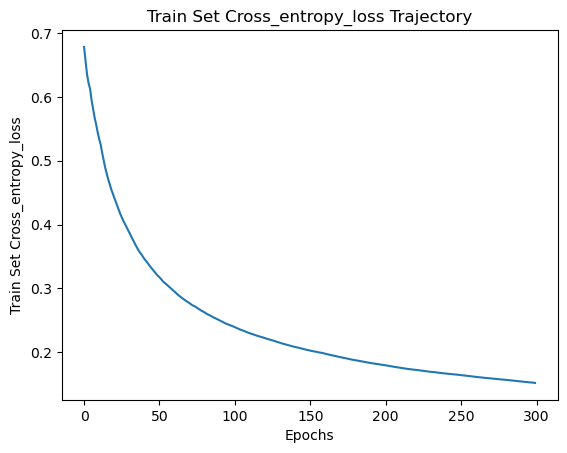

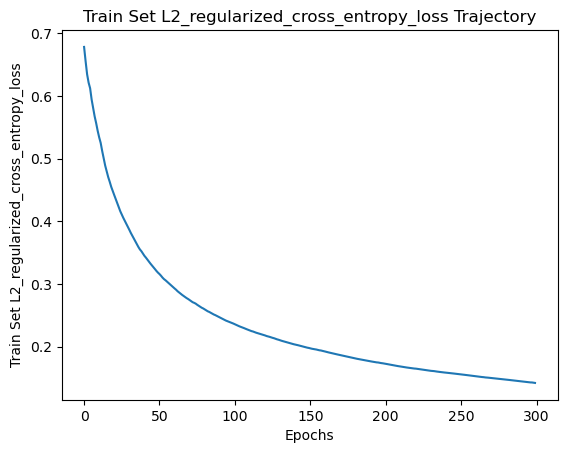

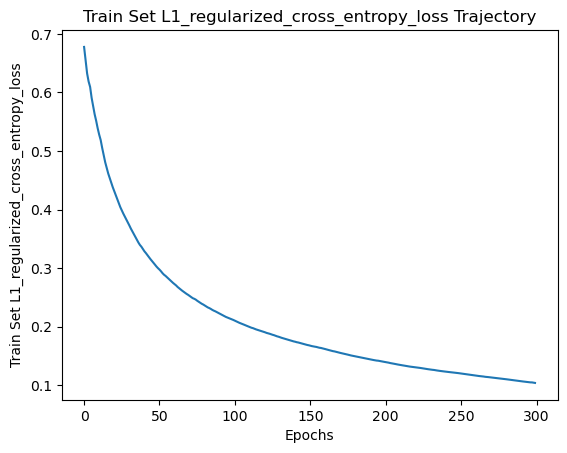

In [440]:

class Optimization:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.loss_obj = Loss(x, y)

    def mean_square_hessian(self):
        return 2 * np.dot(self.x.T, self.x) / len(self.x)

    def cross_entropy_hessian(self, theta):
        p = self.sigmoid(np.dot(self.x, theta))
        W = np.diag(p * (1 - p))
        hess = np.dot(self.x.T, np.dot(W, self.x))
        return hess

    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    def newtons_method(self, theta, lr=0.01, epochs=50, loss_trajectory=None):
        for epoch in range(epochs):
            gradient = self.loss_obj.cross_entropy_gradient(theta)
            hessian = self.cross_entropy_hessian(theta)
            inv_hessian = np.linalg.inv(hessian)
            theta -= lr * np.dot(inv_hessian, gradient)

            # Calculate loss for monitoring
            loss = self.loss_obj.cross_entropy_loss(theta)
            loss_trajectory.append(loss)
        return theta

    def sgd(self, theta, lr=0.01, epochs=50, batch_size=20, loss_trajectory=None,loss_trajectory1=None,loss_trajectory2=None):
        n_samples = self.x.shape[0]
        for epoch in range(epochs):

            indices = np.arange(n_samples)
            np.random.shuffle(indices)
        
           # for i in range(0, n_samples, batch_size):
            batch_indices = indices[i:i + batch_size]
            x_batch = self.x[batch_indices]
            y_batch = self.y[batch_indices]
                
            predictions = Loss.sigmoid(np.dot(x_batch, theta))
            gradient = np.dot(x_batch.T, (predictions - y_batch)) / batch_size
            theta -= lr * gradient
                #print('Updated theta:', theta)

            # Calculate loss for monitoring
            loss = self.loss_obj.cross_entropy_loss(theta)
            loss1 = self.loss_obj.L2_regularized_cross_entropy_loss(theta)
            loss2 = self.loss_obj.L1_regularized_cross_entropy_loss(theta)
            
            loss_trajectory.append(loss)
            loss_trajectory1.append(loss1)
            loss_trajectory2.append(loss2)
            
        return theta


class LogisticRegression:
    def __init__(self):
        self.theta = None
        self.train_loss_trajectory = []
        self.train_loss_trajectory1 = []
        self.train_loss_trajectory2 = []

    def fit(self, x, y, lr=0.01, epochs=200, method="sgd", batch_size=1):
        self.theta = np.zeros(x.shape[1])  # Initialize coefficients (theta)
        optimizer = Optimization(x, y)

        if method == "sgd":
            self.theta = optimizer.sgd(self.theta, lr=lr, epochs=epochs, batch_size=batch_size, loss_trajectory=self.train_loss_trajectory,
                                       loss_trajectory1=self.train_loss_trajectory1, loss_trajectory2=self.train_loss_trajectory2)
        elif method == "newton":
            self.theta = optimizer.newtons_method(self.theta, lr=lr, epochs=epochs, loss_trajectory=self.train_loss_trajectory)
        return self.theta

    def predict_proba(self, x):
        z = np.dot(x, self.theta)
        return Loss.sigmoid(z)

    def predict(self, x, threshold=0.5):
        return (self.predict_proba(x) >= threshold).astype(int)


if __name__ == "__main__":

    model = LogisticRegression()
    
    Xtrainns = np.array(Xtrainn)  # Convert Xtrainn to a NumPy array if it's a DataFrame
    Ytrains = np.array(Ytrain)
    
    model.fit(Xtrainns, Ytrains, lr=0.01, epochs=300, method="sgd", batch_size=20)
    predictions = model.predict(Xtrainns)
    loss_trajectories = [model.train_loss_trajectory, model.train_loss_trajectory1, model.train_loss_trajectory2]
    labels = ['Train Set Cross_entropy_loss', 'Train Set L2_regularized_cross_entropy_loss', 'Train Set L1_regularized_cross_entropy_loss']

for i, trajectory in enumerate(loss_trajectories):
    plt.figure()
    plt.plot(loss_trajectories[i], label=labels[i])
    plt.xlabel('Epochs')
    plt.ylabel(labels[i])
    plt.title(f"{labels[i]} Trajectory")
   # plt.legend()
    plt.show()


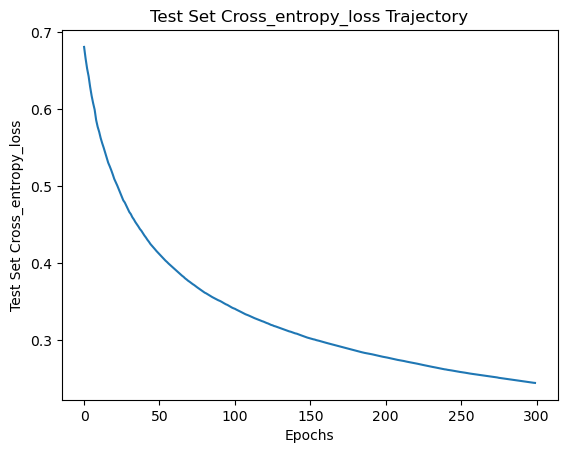

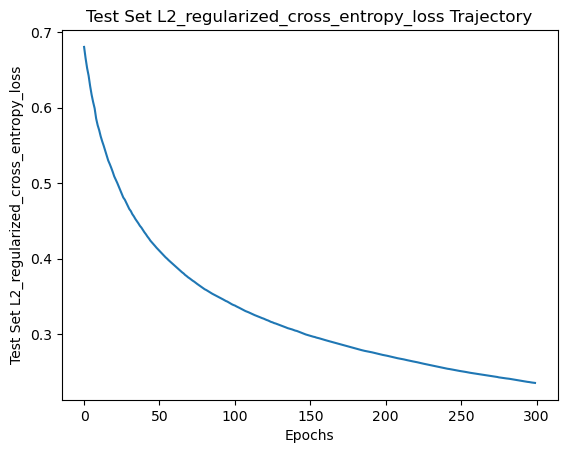

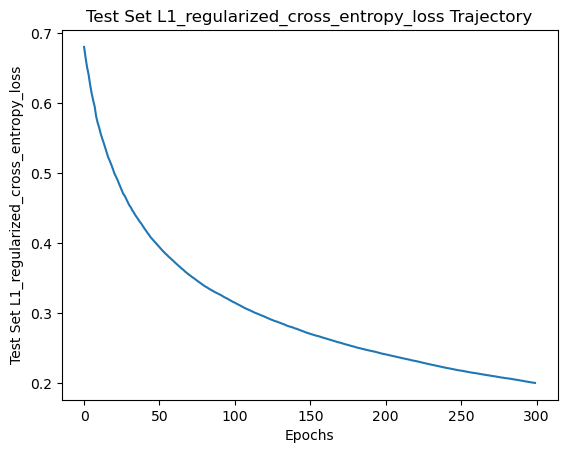

In [441]:
if __name__ == "__main__":

    model2 = LogisticRegression()
    
    Xtestss = np.array(Xtestss)  # Convert Xtrainn to a NumPy array if it's a DataFrame
    Ytests = np.array(Ytests)
    
    model2.fit(Xtestss, Ytests, lr=0.01, epochs=300, method="sgd", batch_size=20)
    predictions2 = model2.predict(Xtestss)
    loss_trajectories2 = [model2.train_loss_trajectory, model2.train_loss_trajectory1, model2.train_loss_trajectory2]
    labels = ['Test Set Cross_entropy_loss', 'Test Set L2_regularized_cross_entropy_loss', 'Test Set L1_regularized_cross_entropy_loss']

for i, trajectory in enumerate(loss_trajectories):
    plt.figure()
    plt.plot(loss_trajectories2[i], label=labels[i])
    plt.xlabel('Epochs')
    plt.ylabel(labels[i])
    plt.title(f"{labels[i]} Trajectory")
   # plt.legend()
    plt.show()

In [442]:
accuracy = np.mean(predictions == Ytrains)
print("Accuracy for Training Dataset :", (accuracy*100))

accuracy2 = np.mean(predictions2 == Ytests)
print("Accuracy for Test Dataset:", (accuracy2*100))

Accuracy for Training Dataset : 97.14285714285714
Accuracy for Test Dataset: 95.6140350877193


##### Confusion Matrix

In [446]:
cm_lr = confusion_matrix(Ytests, predictions2)
cm_lr

array([[26,  0],
       [ 5, 83]], dtype=int64)

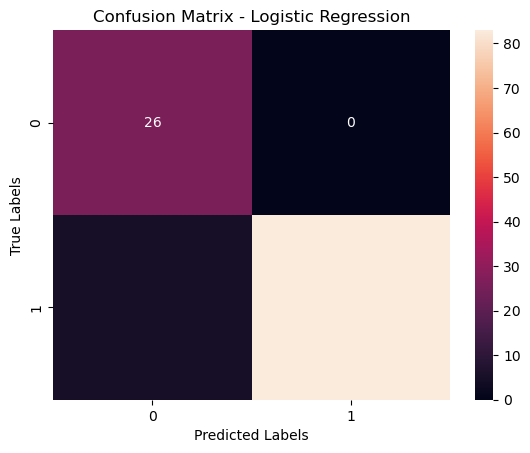

In [445]:
sns.heatmap(cm_lr, annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

True Positives (TP) = 26: The model correctly predicted 26 instances as positive.
True Negatives (TN) = 83: The model correctly predicted 83 instances as negative.
False Positives (FP) = 5: The model incorrectly predicted 5 instances as positive when they were actually negative.
False Negatives (FN) = 0: The model did not miss any actual positive instances


Accuracy= TP+TN / FP+ FN + TP +TN = 95.6%

In [ ]:
### Ridge regressor

hyp_par=([0.8,1],[0.5,0.1],[0.001,0.01])
rmsetrain=[]
rmsetest=[]
alpha_com=[]
lamda_com=[]
for i,j in hyp_par:
    model=SGDRegressor(eta0=i,learning_rate='constant',penalty='l2',shuffle=True,alpha=j)
    model.fit(x_train_rwine,y_train_rwine)
    y_pred=model.predict(x_train_rwine)
    y_pred_test=model.predict(x_test_rwine)
    rmsetrain.append(Math.sqrt(mean_squared_error(y_train_rwine,y_pred)))
    rmsetest.append(Math.sqrt(mean_squared_error(y_test_rwine,y_pred_test)))
    alpha_com.append(i)
    lamda_com.append(j)

from mpl_toolkits import mplot3d
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = plt.axes(projection= '3d')
ax.scatter3D(alpha_com, lamda_com, rmsetrain, c=rmsetrain, cmap='hsv')
ax.set_xlabel('alpha')
ax.set_ylabel('lamda')
ax.set_zlabel('RMSE_TRAIN')
plt.show()


###LASSO
hyp_par=([0.8,1],[0.5,0.1],[0.001,0.01])
rmsetrain=[]
rmsetest=[]
alpha_com=[]
lamda_com=[]
for i,j in hyp_par:
    model=SGDRegressor(eta0=i,learning_rate='constant',penalty='l1',shuffle=True,alpha=j)
    model.fit(x_train_rwine,y_train_rwine)
    y_pred=model.predict(x_train_rwine)
    y_pred_test=model.predict(x_test_rwine)
    rmsetrain.append(Math.sqrt(mean_squared_error(y_train_rwine,y_pred)))
    rmsetest.append(Math.sqrt(mean_squared_error(y_test_rwine,y_pred_test)))
    alpha_com.append(i)
    lamda_com.append(j)

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = plt.axes(projection= '3d')
ax.scatter3D(alpha_com, lamda_com, rmsetrain, c=rmsetrain, cmap='hsv')
ax.set_xlabel('alpha')
ax.set_ylabel('lamda')
ax.set_zlabel('RMSE_TRAIN')
plt.show()

#####Hyperparameters tuning of Ridge Regression
hyp_par={'eta0':[1,0.8,0.5,0.1,0.001,0.00001],'alpha':[0.8,0.5,0.3,0.1,0.001,0.0001]}

model=SGDRegressor(learning_rate='constant',shuffle=True,penalty='l1')
gs_rr=GridSearchCV(model,hyp_par,cv=5)
gs_rr.fit(x_train_rwine,y_train_rwine)
alpha_com=[]
lamda_com=[]
for i in range(len(gs_rr.cv_results_['params'])):
    alpha_com.append(gs_rr.cv_results_['params'][i]['alpha'])
    lamda_com.append(gs_rr.cv_results_['params'][i]['eta0'])

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = plt.axes(projection= '3d')
ax.scatter3D(alpha_com, lamda_com, gs_rr.cv_results_['mean_test_score'], c=gs_rr.cv_results_['mean_test_score'], cmap='hsv')
ax.set_xlabel('alpha')
ax.set_ylabel('lamda')
ax.set_zlabel('mean_test_score')
plt.show()



####Cross validation on Ridge Regression
model=SGDRegressor(learning_rate='constant',shuffle=True,penalty='l2',eta0=gs_rr.best_params_['eta0'],alpha=gs_rr.best_params_['alpha'])
model.fit(x_train_rwine,y_train_rwine)
y_pred=model.predict(x_train_rwine)
y_pred_test=model.predict(x_test_rwine)
cross_val_train_rr=cross_val_score(model,x_train_rwine,y_train_rwine,cv=5)
cross_val_test_rr=cross_val_score(model,x_test_rwine,y_test_rwine,cv=5)

####Polynomial Regression
fig,axs=plt.subplots(1,1,figsize=(10,10))
axs.scatter(d1_x,d1_y,color='orange',marker='*',label="training points")
axs.set_xlabel('X')
axs.set_ylabel('predicted Y')
axs.legend()
rmse=[]
degree=[1,2,7,10,16,100]
for i in degree:
    model=LinearRegression()
    polyf=PolynomialFeatures(degree=i)
    poly_x=polyf.fit_transform(d1_x)
    model.fit(poly_x,d1_y)
    y_pred=model.predict(poly_x)
    X,Y=zip(*sorted(zip(d1_x,y_pred)))
    axs.plot(X,Y,label="degree %i" % i)
axs.legend()
plt.show()


#### Effect of Regularization
lamda=[0,10**-6,10**-2,1]
fig,axs=plt.subplots(1,1,figsize=(10,10))
axs.scatter(d1_x,d1_y,color='orange',marker='*',label="training points")
axs.set_xlabel('X')
axs.set_ylabel('predicted Y')
axs.legend()
for i in lamda:
    model=Ridge(alpha=i)
    polyf=PolynomialFeatures(degree=10)
    poly_x=polyf.fit_transform(d1_x)
    model.fit(poly_x,d1_y)
    y_pred=model.predict(poly_x)
    X,Y=zip(*sorted(zip(d1_x,y_pred)))
    axs.plot(X,Y)
axs.legend()
plt.show()



Perform Backward Feature Selection iteratively using the AIC Metric:
• Apply this only to the combination of Cross-Entropy Loss and SGD.
• Select the most important features based on AIC.


In [435]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class Loss:
    def __init__(self, x, y, lambda_=0.01):
        self.x = x
        self.y = y
        self.lambda_ = lambda_  ## Adding lambda

    def cross_entropy_loss(self, theta):
        predictions = self.sigmoid(np.dot(self.x, theta))
        return -np.mean(self.y * np.log(predictions) + (1 - self.y) * np.log(1 - predictions))

    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

class Optimization:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.loss_obj = Loss(x, y)

    def sgd(self, theta, lr=0.01, epochs=50, batch_size=20, loss_trajectory=None):
        n_samples = self.x.shape[0]
        for epoch in range(epochs):
            indices = np.arange(n_samples)
            np.random.shuffle(indices)
            
            for i in range(0, n_samples, batch_size):
                batch_indices = indices[i:i + batch_size]
                x_batch = self.x[batch_indices]
                y_batch = self.y[batch_indices]

                predictions = Loss.sigmoid(np.dot(x_batch, theta))
                gradient = np.dot(x_batch.T, (predictions - y_batch)) / batch_size
                theta -= lr * gradient

                # Calculate loss for monitoring
                loss = self.loss_obj.cross_entropy_loss(theta)
                loss_trajectory.append(loss)

        return theta

class LogisticRegression:
    def __init__(self):
        self.theta = None
        self.train_loss_trajectory = []

    def fit(self, x, y, lr=0.01, epochs=200, batch_size=1):
        self.theta = np.zeros(x.shape[1])  # Initialize coefficients (theta)
        optimizer = Optimization(x, y)
        self.theta = optimizer.sgd(self.theta, lr=lr, epochs=epochs, batch_size=batch_size, loss_trajectory=self.train_loss_trajectory)
        return self.theta

    def predict_proba(self, x):
        z = np.dot(x, self.theta)
        return Loss.sigmoid(z)

    def predict(self, x, threshold=0.5):
        return (self.predict_proba(x) >= threshold).astype(int)

# AIC calculation function based on cross-entropy loss and number of parameters
def compute_aic(model, X, y):
    predictions = model.predict_proba(X)
    loss = Loss(X, y).cross_entropy_loss(model.theta)
    num_params = len(model.theta)
    return 2 * num_params + 2 * loss * len(y)
    #return -2 * loss + 2 * num_params 

# Backward Feature Selection with AIC
def backward_feature_selection(X, y, min_features=1):
    selected_features = list(X.columns)  
    best_aic = float('inf')  # Initialize with a very high AIC value
    best_features = selected_features.copy()
    
    while len(selected_features) >= min_features:
        # Train model with the current set of selected features
        X_selected = X[selected_features]
        model = LogisticRegression()
        model.fit(X_selected.values, y, lr=0.01, epochs=300, batch_size=20)
        
        # Compute AIC for the model with the current features
        current_aic = compute_aic(model, X_selected.values, y)

        # Initialize variables to track best feature to remove
        worst_feature = None
        best_aic_with_removal = current_aic

        # Try removing each feature and calculate the resulting AIC
        for feature in selected_features:
            temp_features = [f for f in selected_features if f != feature]
            X_temp = X[temp_features]
            
            # Train model without this feature
            temp_model = LogisticRegression()
            temp_model.fit(X_temp.values, y, lr=0.01, epochs=300, batch_size=20)
            temp_aic = compute_aic(temp_model, X_temp.values, y)

            # Check if this removal results in a lower AIC
            if temp_aic < best_aic_with_removal:
                best_aic_with_removal = temp_aic
                worst_feature = feature

        # If removing the worst feature improves AIC, update selected features
        if worst_feature is not None and best_aic_with_removal < current_aic:
            selected_features.remove(worst_feature)
            best_aic = best_aic_with_removal
            best_features = selected_features.copy()
        else:
            # Stop if no improvement is possible
            break

    return best_features, best_aic

# Example usage
if __name__ == "__main__":

    Xtrainnz = Xtrainn.copy()  # Convert Xtrainn to a NumPy array if it's a DataFrame
    Ytrainz = np.array(Ytrain.copy())

    # Perform backward feature selection
    best_features, best_aic = backward_feature_selection(Xtrainnz, Ytrainz, min_features=1)
    print("Selected Features:", best_features)
    print("Best AIC:", best_aic)


Selected Features: ['X2', 'X11', 'X20', 'X21', 'X23', 'X25', 'X28']
Best AIC: 80.33208544091798


Implement both forward search and backward search and apply them to the provided data using a linear regression model. At the start of each outer loop, report the currently selected variables V as well as the loss on the training and validation set

In [ ]:
####extra
from sklearn.linear_model import LinearRegression

np.random.seed(2022)
dataset = datasets.load_diabetes()
x_data = dataset["data"]
y_data = dataset["target"]
#print(dataset["DESCR"])
n, m = x_data.shape
split = int(0.8 * n)
p = np.random.permutation(n)
x_train = x_data[p[:split]]
y_train = y_data[p[:split]]
x_valid = x_data[p[split:]]
y_valid = y_data[p[split:]]

def backward_search(x_train, y_train, x_valid, y_valid):
    print('---*backward_search*---')
    num_features = x_train.shape[1]
    V_features = np.arange(num_features)
    reg = LinearRegression().fit(x_train, y_train)
    e_all_best = reg.score(x_valid, y_valid)
    v_best = 1
    
    while v_best != None and len(V_features) != 0:
        reg.fit(x_train[:, V_features], y_train)
        print('Currently selected Features: ')
        print(V_features)
        print('Loss on Training set')
        print(reg.score(x_train[:, V_features], y_train))
        print('Loss on Validation set')
        print(reg.score(x_valid[:, V_features], y_valid))
        v_best = None
        e_best = e_all_best
        for i in V_features:
            V_ap_current = [x for x in V_features if x != i]
            if len(V_features) == 1:
                reg.fit(x_train[:, i].reshape(-1, 1), y_train)
                e = reg.score(x_valid[:, i].reshape(-1, 1), y_valid)
            else:
                reg.fit(x_train[:, V_ap_current], y_train)
                e = reg.score(x_valid[:, V_ap_current], y_valid)
            if e < e_best:
                v_best = i
                e_best = e
        if e_best < e_all_best:
            if len(V_features) == 1:
                V_features = []
            else:
                V_features = [x for x in V_features if x != v_best]
            
            e_all_best = e_best
    return V_features


def forward_search(x_train, y_train, x_valid, y_valid):
    print('---*forward_search*---')
    V_features = []
    reg = LinearRegression().fit(x_train, y_train)
    e_all_best = reg.score(x_valid, y_valid)
    num_features = x_train.shape[1]
    v_best = 1
    
    while v_best != None:
        print('Currently selected Features: ')
        print(V_features)
        if len(V_features) == 0:
            reg.fit(x_train, y_train)
            print('Loss on Training set')
            print(reg.score(x_train, y_train))
            print('Loss on Validation set')
            print(reg.score(x_valid, y_valid))
        else:
            reg.fit(x_train[:, V_features], y_train)
            print('Loss on Training set')
            print(reg.score(x_train[:, V_features], y_train))
            print('Loss on Validation set')
            print(reg.score(x_valid[:, V_features], y_valid))
        
        v_best = None
        e_best = e_all_best
        for i in [x for x in np.arange(num_features) if x not in V_features]:
            V_ap_current = V_features + [i]
            reg.fit(x_train[:, V_ap_current], y_train)
            e = reg.score(x_valid[:, V_ap_current], y_valid)
            if e < e_best:
                v_best = i
                e_best = e
        if e_best < e_all_best:
            V_features.append(v_best)
            e_all_best = e_best
    return V_features

In [ ]:
########## another forward, backward selection

from sklearn import datasets
import numpy as np

np.random.seed(2022)
dataset = datasets.load_diabetes()
x_data = dataset["data"]
y_data = dataset["target"]
n, m = x_data.shape
split = int(0.8 * n)
p = np.random.permutation(n)
x_train = x_data[p[:split]]
y_train = y_data[p[:split]]
x_valid = x_data[p[split:]]
y_valid = y_data[p[split:]]
print(dataset["DESCR"])

class LinearModel:
    def fit(self, X, Y):
        N = len(X)
        X = np.concatenate([np.ones((N, 1)), X], axis=-1)
        param, *_ = np.linalg.lstsq(X, Y, rcond=None)
        self.bias = param[0]
        self.beta = param[1:]
        return self

    def predict(self, X):
        return np.einsum("...m, m->...", X, self.beta) + self.bias

    def score(self, X, Y):
        return 0.5 * np.mean((Y - self.predict(X)) ** 2)


def forward_search(model, x_train, y_train, x_valid, y_valid):
    """Returns the best set of variables and corresponding val. error."""
    print(f"~~~ Forward Search ~~~")
    N, M = x_train.shape
    print(f"{M} vars, {N}/{len(x_valid)} train/valid samples")

    # train model with only bias term
    V = set()  # <-- these are the only difference
    model.fit(x_train[:, list(V)], y_train)
    e_train = model.score(x_train[:, list(V)], y_train)
    e_valid = model.score(x_valid[:, list(V)], y_valid)

    while True:
        print(f"{e_train=:4.2f}  {e_valid=:4.2f}  {V=}")
        vbest = None
        for v in set(range(M)) - V:  # <-- these are the only difference
            Vdash = V | {v}  # <-- these are the only difference
            model.fit(x_train[:, list(Vdash)], y_train)
            e_train_dash = model.score(x_train[:, list(Vdash)], y_train)
            e_valid_dash = model.score(x_valid[:, list(Vdash)], y_valid)
            if e_valid_dash < e_valid:
                vbest, e_valid, e_train = v, e_valid_dash, e_train_dash
        if vbest is None:
            break
        V = V | {vbest}  # <-- these are the only difference
    return V, e_valid


def backward_search(model, x_train, y_train, x_valid, y_valid):
    """Returns the best set of variables and corresponding val. error."""
    print(f"~~~ Backward Search ~~~")
    N, M = x_train.shape
    print(f"{M} vars, {N}/{len(x_valid)} train/valid samples")

    # train model with only bias term
    V = set(range(M))  # <-- these are the only difference
    model.fit(x_train[:, list(V)], y_train)
    e_train = model.score(x_train[:, list(V)], y_train)
    e_valid = model.score(x_valid[:, list(V)], y_valid)

    while True:
        print(f"{e_train=:4.2f}  {e_valid=:4.2f}  {V=}")
        vbest = None
        for v in V:  # <-- these are the only difference
            Vdash = V - {v}  # <-- these are the only difference
            model.fit(x_train[:, list(Vdash)], y_train)
            e_train_dash = model.score(x_train[:, list(Vdash)], y_train)
            e_valid_dash = model.score(x_valid[:, list(Vdash)], y_valid)
            if e_valid_dash < e_valid:
                vbest, e_valid, e_train = v, e_valid_dash, e_train_dash
        if vbest is None:
            break
        V = V - {vbest}  # <-- these are the only difference
    return V, e_valid


model = LinearModel()
forward_search(model, x_train, y_train, x_valid, y_valid)
backward_search(model, x_train, y_train, x_valid, y_valid);

## B: repeating the experiment 100 times with different random seeds

N, M = x_data.shape
forward_vars = []
forward_score = []
backward_vars = []
backward_score = []
baseline_score = []
num_runs = 100

for k in range(num_runs):
    p = np.random.permutation(N)
    x_train = x_data[p[:split]]
    y_train = y_data[p[:split]]
    x_valid = x_data[p[split:]]
    y_valid = y_data[p[split:]]
    v, score = forward_search(model, x_train, y_train, x_valid, y_valid)
    forward_vars.append(v)
    forward_score.append(score)

    v, score = backward_search(model, x_train, y_train, x_valid, y_valid)
    backward_vars.append(v)
    backward_score.append(score)
    model = LinearModel().fit(x_train, y_train)
    baseline_score.append(model.score(x_valid, y_valid))

### Performance difference

fscore = np.mean(forward_score)
bscore = np.mean(backward_score)
base = np.mean(baseline_score)
print(
    f"Average validation score over {num_runs} runs:",
    f"Baseline (all variables): {base:.2f}",
    f"Forward  selection: {fscore:.2f}, ({100*(base/fscore-1):.2f}% improvement)",
    f"Backward selection: {bscore:.2f}, ({100*(base/bscore-1):.2f}% improvement)",
    sep="\n",
)

### Which variables were selected the most?

from collections import Counter
import pandas as pd

selected_forward = Counter([v for V in forward_vars for v in V])
selected_backward = Counter([v for V in backward_vars for v in V])
feature_names = dataset["feature_names"]
count_forward = {feature_names[k]: v for k, v in selected_forward.items()}
count_backward = {feature_names[k]: v for k, v in selected_backward.items()}

count = pd.DataFrame(
    [count_forward, count_backward],
    index=pd.Index(["forward", "backward"], name="method"),
)




Consider solving problem 2 from tutorial 1 with three different models:
1. Linear Regression model yˆ
linear(x) = α0 + α1x with αˆ =

0.46, 0.16
. This model treats the problem as a
regression problem and is fitted on the chance of passing directly.
2. Quadratic Regression model yˆ
quadratic(x) = β0 + β1x + β2x
2 with βˆ =

0.30, 0.44, −0.07
, which uses x
2
as an augmented feature, but otherwise works the same way as a regular linear regression
3. Logistic Regression model yˆ
logistic(x) = σ(γ0 + γ1x) with γˆ =

−0.71, 1.44
. This model treats the problem
as a classification problem and is fitted to the individual samples (one per student).
Compute the BIC for all models on this task, using (2) for the linear/quadratic regression models and (5) for
the logistic regression model.
                                                                                                         
                                                                                                         
bonus points 0 0.5 1 1.5 2 2.5 3 3.5 4
num. students 18 6 8 2 4 3 8 5 17
num. passed 3 5 3 2 3 3 8 5 16                                                                                                     

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = np.array(
    [
        [0.0, 18, 3],
        [0.5, 6, 5],
        [1.0, 8, 3],
        [1.5, 2, 2],
        [2.0, 4, 3],
        [2.5, 3, 3],
        [3.0, 8, 8],
        [3.5, 5, 5],
        [4.0, 17, 16],
    ]
)
# regression dataset
num_bonus = data[:, 0]
num_students = data[:, 1].astype(int)
num_passed = data[:, 2].astype(int)
num_failed = num_students - num_passed
chance = num_passed / num_students

# dataset for classification
bonus = num_bonus.repeat(num_passed + num_failed)
bonus_passed = num_bonus.repeat(num_passed)
bonus_failed = num_bonus.repeat(num_failed)
passed = np.ones(sum(num_passed))
failed = np.zeros(sum(num_failed))
label = np.concatenate(
    [np.concatenate([np.ones(p), np.zeros(f)]) for p, f in zip(num_passed, num_failed)]
)


from scipy.special import xlogy


def H(y, yhat):  # cross entropy
    # NOTE: we use the special xlogy function to avoid numerical issues
    # The reason is that computing 0log(0) naively will give you NaN
    # But 0log0 is well defined as 0.
    return -np.sum(xlogy(y, yhat) + xlogy(1 - y, 1 - yhat))

    # alternative implementation using case distinction:
    return -np.sum(np.log(np.where(y, yhat, 1 - yhat)))


def MSE(y, yhat):
    return np.mean((y - yhat) ** 2)


def yhat_polynomial(x, beta):
    X = np.stack([x**i for i in range(len(beta))], axis=-1)
    return X @ beta


def yhat_logistic(x, beta):
    X = np.stack([x**i for i in range(len(beta))], axis=-1)
    z = X @ beta
    return 1 / (1 + np.exp(-z))


def nll_gaussian(y, yhat):
    return 0.5 * len(y) * np.log(2 * np.pi * np.e * MSE(y, yhat))


def nll_bernoulli(y, yhat):
    return H(y, yhat)


def BIC_score(LL: float, D: int, N: int) -> float:
    return LL - 0.5 * D * np.log(N)


def BIC_loss(LL: float, D: int, N: int) -> float:
    return -2 * BIC_score(LL, D, N)


def AIC_score(LL: float, D: int, N: int) -> float:
    return 2 * D - 2 * LL


def AIC_loss(LL: float, D: int, N: int) -> float:
    return 2 * LL - 2 * D


## Solve the optimization problem wth respect to NLL


from scipy.optimize import minimize

loss_linear = lambda b: nll_gaussian(chance, yhat_polynomial(num_bonus, b))
result_linear = minimize(loss_linear, np.zeros(2))
nll_linear = result_linear.fun
beta_linear = result_linear.x.round(2)
loss_quadratic = lambda b: nll_gaussian(chance, yhat_polynomial(num_bonus, b))
result_quadratic = minimize(loss_quadratic, np.zeros(3))
nll_quadratic = result_quadratic.fun
beta_quadratic = result_quadratic.x.round(2)

loss_logistic = lambda b: nll_bernoulli(label, yhat_logistic(bonus, b))
result_logistic = minimize(loss_logistic, np.zeros(2))
nll_logistic = result_logistic.fun
beta_logistic = result_logistic.x.round(2)

nll_faked = nll_gaussian(chance, yhat_logistic(num_bonus, beta_logistic))
beta_faked = beta_logistic

results_dict = {
    "model": ["linear", "quadratic", "logistic"],
    "beta": [beta_linear, beta_quadratic, beta_logistic],
    "NLL": [nll_linear, nll_quadratic, nll_logistic],
    "N": [len(chance), len(chance), len(label)],
    "D": [len(beta_linear), len(beta_quadratic), len(beta_logistic)],
}
funcs = (yhat_polynomial, yhat_polynomial, yhat_logistic)
results = pd.DataFrame(results_dict).set_index("model")
results["MSE"] = [
    MSE(chance, yhat(num_bonus, b)) for yhat, b in zip(funcs, results["beta"])
]
results["H"] = [H(label, yhat(bonus, b)) for yhat, b in zip(funcs, results["beta"])]
results["BIC-score"] = BIC_score(-results["NLL"], results["D"], results["N"])
results["AIC-score"] = AIC_score(-results["NLL"], results["D"], results["N"])
results = results.round(2)


# for copy pasting into the solution sheet
print(results.style.format(precision=2).to_latex(hrules=True))


fig, ax = plt.subplots(figsize=(6, 2.75), constrained_layout=True)

t = np.linspace(0, 4)

ax.scatter(num_bonus, [1] * len(num_bonus), s=4 * num_passed, c="g", label="passed")
ax.scatter(num_bonus, [0] * len(num_bonus), s=4 * num_failed, c="r", label="failed")
ax.plot(num_bonus, chance, "*k", label="chance of passing")

ax.plot(t, yhat_polynomial(t, results.loc["linear", "beta"]), label="linear")
ax.plot(t, yhat_polynomial(t, results.loc["quadratic", "beta"]), label="quadratic")
ax.plot(t, yhat_logistic(t, results.loc["logistic", "beta"]), label="logistic")

ax.set_xlabel("bonus points")
ax.set_ylabel("chance of passing")
ax.set_ylim([-0.1, 1.1])
ax.legend()
fig.savefig("bic_example.pdf")



# Treating all models as Gaussian models

We consider the following models:

- $\hat{p}(y∣x) = N(y∣\hat{y}^\text{linear}(x)，σ²)$
- $\hat{p}(y∣x) = N(y∣\hat{y}^\text{quadratic}(x)，σ²)$
- $\hat{p}(y∣x) = N(y∣\hat{y}^\text{logistic}(x)，σ²)$

In [ ]:
from scipy.optimize import minimize

loss_linear = lambda b: nll_gaussian(chance, yhat_polynomial(num_bonus, b))
result_linear = minimize(loss_linear, np.zeros(2))
nll_linear = result_linear.fun
beta_linear = result_linear.x.round(2)

loss_quadratic = lambda b: nll_gaussian(chance, yhat_polynomial(num_bonus, b))
result_quadratic = minimize(loss_quadratic, np.zeros(3))
nll_quadratic = result_quadratic.fun
beta_quadratic = result_quadratic.x.round(2)

loss_logistic = lambda b: nll_gaussian(chance, yhat_logistic(num_bonus, b))
result_logistic = minimize(loss_logistic, np.zeros(2))
nll_logistic = result_logistic.fun
beta_logistic = result_logistic.x.round(2)

results_dict = {
    "model": ["linear", "quadratic", "logistic (gaussian)"],
    "beta": [beta_linear, beta_quadratic, beta_logistic],
    "N": [len(chance), len(chance), len(chance)],
    "D": [len(beta_linear), len(beta_quadratic), len(beta_logistic)],
    "NLL": [nll_linear, nll_quadratic, nll_logistic],
}
funcs = (yhat_polynomial, yhat_polynomial, yhat_logistic)
results = pd.DataFrame(results_dict).set_index("model")
results["MSE"] = [
    MSE(chance, yhat(num_bonus, b)) for yhat, b in zip(funcs, results["beta"])
]
results["H"] = [H(label, yhat(bonus, b)) for yhat, b in zip(funcs, results["beta"])]
results["BIC-score"] = BIC_score(-results["NLL"], results["D"], results["N"])
results["AIC-score"] = AIC_score(-results["NLL"], results["D"], results["N"])
results = results.round(2)

# for copy pasting into the solution sheet
print(results.style.format(precision=2).to_latex(hrules=True))

## Forecast plot -- all models using Normal distribution.

fig, ax = plt.subplots(figsize=(6, 2.75), constrained_layout=True)

t = np.linspace(0, 4)

ax.scatter(num_bonus, [1] * len(num_bonus), s=4 * num_passed, c="g", label="passed")
ax.scatter(num_bonus, [0] * len(num_bonus), s=4 * num_failed, c="r", label="failed")
ax.plot(num_bonus, chance, "*k", label="chance of passing")

ax.plot(t, yhat_polynomial(t, results.loc["linear", "beta"]), label="linear")
ax.plot(
    t,
    yhat_polynomial(t, results.loc["quadratic", "beta"]),
    label="quadratic",
)
ax.plot(
    t,
    yhat_logistic(t, results.loc["logistic (gaussian)", "beta"]),
    label="logistic (gaussian)",
)

ax.set_xlabel("bonus points")
ax.set_ylabel("chance of passing")
ax.set_ylim([-0.1, 1.1])
ax.legend()
fig.savefig("bic_all_models_gaussian.pdf")

# Treating all models as Bernoulli models

We consider the following models:

- $\hat{p}(y∣x) = \Ber(y∣\clip_{[0, 1]}(\hat{y}^\text{linear}(x)))$
- $\hat{p}(y∣x) = \Ber(y∣\clip_{[0, 1]}(\hat{y}^\text{quadratic}(x)))$
- $\hat{p}(y∣x) = \Ber(y∣\hat{y}^\text{logistic}(x))$

Note that in practice, we need to clip smaller than 1, or else the model breaks,
as the cross entropy will attain a value if $-∞$ if $y=0$ and $p=1$.

In [ ]:
from scipy.optimize import minimize


def yhat_polynomial_clipped(x, beta, tol=0.001):
    # note: if tol=0, then the  model breaks
    yhat = yhat_polynomial(x, beta)
    return np.clip(yhat, tol, 1 - tol)


loss_linear = lambda b: nll_bernoulli(label, yhat_polynomial_clipped(bonus, b))
result_linear = minimize(loss_linear, np.random.rand(2))
nll_linear = result_linear.fun
beta_linear = result_linear.x.round(2)

loss_quadratic = lambda b: nll_bernoulli(label, yhat_polynomial_clipped(bonus, b))
result_quadratic = minimize(loss_quadratic, np.random.rand(3))
nll_quadratic = result_quadratic.fun
beta_quadratic = result_quadratic.x.round(2)

loss_logistic = lambda b: nll_bernoulli(label, yhat_logistic(bonus, b))
result_logistic = minimize(loss_logistic, np.random.rand(2))
nll_logistic = result_logistic.fun
beta_logistic = result_logistic.x.round(2)

results_dict = {
    "model": ["linear (clipped)", "quadratic (clipped)", "logistic"],
    "beta": [beta_linear, beta_quadratic, beta_logistic],
    "N": [len(label), len(label), len(label)],
    "D": [len(beta_linear), len(beta_quadratic), len(beta_logistic)],
    "NLL": [nll_linear, nll_quadratic, nll_logistic],
}
funcs = (yhat_polynomial_clipped, yhat_polynomial_clipped, yhat_logistic)
results = pd.DataFrame(results_dict).set_index("model")
results["MSE"] = [
    MSE(chance, yhat(num_bonus, b)) for yhat, b in zip(funcs, results["beta"])
]
results["H"] = [H(label, yhat(bonus, b)) for yhat, b in zip(funcs, results["beta"])]
results["BIC-score"] = BIC_score(-results["NLL"], results["D"], results["N"])
results["AIC-score"] = AIC_score(-results["NLL"], results["D"], results["N"])
results.round(2)

# for copy pasting into the solution sheet
print(results.style.format(precision=2).to_latex(hrules=True))


fig, ax = plt.subplots(figsize=(6, 2.75), constrained_layout=True)

t = np.linspace(0, 4)

ax.scatter(num_bonus, [1] * len(num_bonus), s=4 * num_passed, c="g", label="passed")
ax.scatter(num_bonus, [0] * len(num_bonus), s=4 * num_failed, c="r", label="failed")
ax.plot(num_bonus, chance, "*k", label="chance of passing")

ax.plot(
    t,
    yhat_polynomial_clipped(t, results.loc["linear (clipped)", "beta"]),
    label="linear (clipped)",
)
ax.plot(
    t,
    yhat_polynomial_clipped(t, results.loc["quadratic (clipped)", "beta"]),
    label="quadratic (clipped)",
)
ax.plot(t, yhat_logistic(t, results.loc["logistic", "beta"]), label="logistic")

ax.set_xlabel("bonus points")
ax.set_ylabel("chance of passing")
ax.set_ylim([-0.1, 1.1])
ax.legend()
fig.savefig("bic_all_models_logistic.pdf")




### 2.  K-Fold Cross Validation

, you will implement Grid Search with K-Fold Cross-Validation for model
selection, i.e., for choosing the best hyperparameters.
A [3 point] Use k = 3 folds for validation and implement the L2-regularized cross-entropy loss with gradient
descent and fixed step-length control. Identify the optimal L2-regularization parameter λ and step length α.

In [271]:
Xtestss = np.array(Xtestss)  # Convert Xtest to a NumPy array if it's a DataFrame (Already did for training dateset earlier)
Ytests = np.array(Ytests)

In [135]:
Xtrain = train_data.drop('Y', axis=1)
Ytrain = train_data['Y'].astype(float)
Xtrainn = (Xtrain - Xtrain.mean())/Xtrain.std()


Xtests = test_data.drop('Y', axis=1)
Ytests = test_data['Y'].astype(float)
Xtestss = (Xtests - Xtests.mean())/Xtests.std()

In [136]:
y_train_bank=pd.DataFrame(Ytrain.values.reshape(-1,1))
y_test_bank=pd.DataFrame(Ytests.values.reshape(-1,1))
x_train_bank=pd.DataFrame(Xtrainn.values)
x_test_bank=pd.DataFrame(Xtestss.values)

In [137]:
print('x_train_bank :',x_train_bank.shape)
print('x_test_bank :',x_test_bank.shape)
print('y_train_bank :',y_train_bank.shape)
print('y_test_bank :',y_test_bank.shape)

x_train_bank : (455, 30)
x_test_bank : (114, 30)
y_train_bank : (455, 1)
y_test_bank : (114, 1)


In [365]:
def logistic_function(X, beta):
    z = np.dot(X,beta)
    return 1 / (1 + np.exp(-z))

def log_likelihood(x, y, beta):
    z = np.dot(x, beta)
    log = np.sum( y*z - np.log(1 + np.exp(z)) )
    return log
    
#L2-regularized cross-entropy loss

betas = lambda x,y,beta,alpha,lamda : beta-alpha*(-2*np.dot(x.T,y-logistic_function(x, beta))+(2*lamda)*beta)
    
def stochastic_gradient_descent(x_train,y_train,alpha,epochs,lamda,x_test,y_test):
    m_train,n_features = np.shape(x_train)
    ini_alpha          = alpha
    beta_hat           = np.random.random(n_features).reshape(-1,1)
    logtrain          = []
    logtest           = []
    y_hat              = logistic_function(x_train,beta_hat)
    
    chunk_size = 20
    
    for i in range(epochs):
        for chunk in range(len(x_train)//chunk_size):
            x_chunk  = x_train[chunk*chunk_size:min((chunk+1)*chunk_size,len(x_train))]
            y_chunk  = y_train[chunk*chunk_size:min((chunk+1)*chunk_size,len(y_train))]

            beta_hat = betas(x_chunk,y_chunk,beta_hat,alpha,lamda)
        
            y_hat=logistic_function(x_train,beta_hat)

            logtest.append(log_likelihood(x_test,y_test,beta_hat))
            logtrain.append(log_likelihood(x_train, y_train,beta_hat))
       
    return logtest,logtrain,beta_hat


In [379]:
import math as Math

def gridsearch(alpha,lamda):
    comb=[]
    for i in range(0,len(alpha)):
        for k in range(0,len(lamda)):
            comb.append(dict([('alpha',alpha[i]),('lamda',lamda[k])]))
    return comb

def data_k_divide(data,k):
    k_size=Math.floor(len(data)/k)
    k_data=[] 
    c=0
    for i in range (0,k):
        data_set=pd.DataFrame(data.head(0))
        for j in range(i*k_size,(i*k_size)+k_size):
            #data_set=data_set.append(data.iloc[j])
            data_set=pd.concat([data_set, data.iloc[[j]]])
            c=c+1
        k_data.append(data_set)
        
    #adding datas which are remaining at the end of k division
    # for j in range(c,len(data)):
    #     k_data[k-1]=k_data[k-1].append(data.iloc[j])
    return k_data

def k_data_train_test(x,y,k):
    k_folded_data=[]
    for i in range(0,k):
        x_test=x[i]
        y_test=y[i]
        x_train=pd.DataFrame()
        y_train=pd.DataFrame()
        for j in range(0,k):
            if i!=j:
                
                x_train = pd.concat([x_train, x[j]])
                y_train = pd.concat([y_train, y[j]])

        
        final_data=dict([('x',x_train),('y',y_train),('xt',x_test),('yt',y_test)])
        k_folded_data.append(final_data)
    return k_folded_data
    
def kfold(x_train,y_train,k,x_test,y_test):
    x_train_k=data_k_divide(x_train,k)
    y_train_k=data_k_divide(y_train,k)
    data=k_data_train_test(x_train_k,y_train_k,k)
    return data

In [513]:
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

alpha=[0.0001,0.00001,0.001,0.05,0.008]
lamda=[0.0000001,0.1,0.5,0.01,0.006]
epochs=20
k=3
parameter=gridsearch(alpha,lamda)
log_test=[]
log_last=[]
log_train=[]
alpha_com=[]
lamda_com=[]
avg_log=[]

## Just commenting to save space

for i in range (0,len(parameter)):
    k_folded_data=kfold(x_train_bank,y_train_bank,k,x_test_bank,y_test_bank)
    for j in range(0,k):
            logtest,logtrain,beta_hat =stochastic_gradient_descent(k_folded_data[j]['x'],k_folded_data[j]['y'],parameter[i]['alpha'],epochs,parameter[i]['lamda'],k_folded_data[j]['xt'],k_folded_data[j]['yt'])
            log_last.append(logtest[-1])
            log_test.append(logtest)
            log_train.append(logtrain)
    alpha_com.append(parameter[i]['alpha'])
    lamda_com.append(parameter[i]['lamda'])
    avg_log.append(np.mean(log_last))

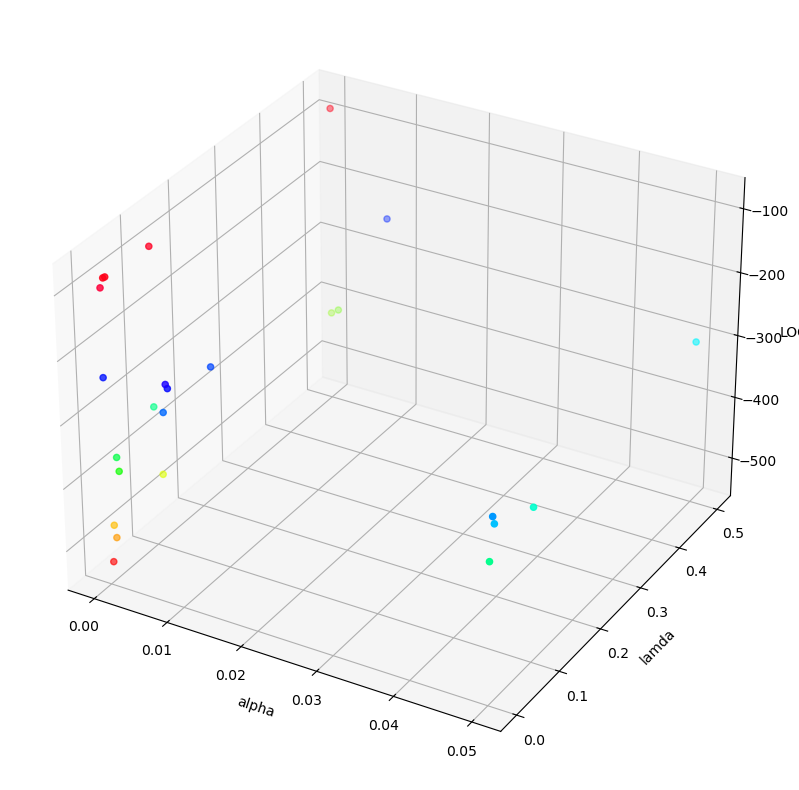

In [384]:
from mpl_toolkits import mplot3d
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = plt.axes(projection= '3d')
ax.scatter3D(alpha_com, lamda_com, avg_log, c=avg_log, cmap='hsv')
ax.set_xlabel('alpha')
ax.set_ylabel('lamda')
ax.set_zlabel('LOG')
plt.show()

In [397]:
combined_df = pd.DataFrame({
    'alpha': alpha_com,
    'lamda': lamda_com,
    'avg_log': avg_log
})
combined_df.sort_values('avg_log', ascending=False)

,alpha,lamda,avg_log
4,0.00010,6.000000e-03,-84.380376
2,0.00010,5.000000e-01,-84.741091
3,0.00010,1.000000e-02,-85.143950
1,0.00010,1.000000e-01,-88.523028
0,0.00010,1.000000e-07,-96.002594
24,0.00800,6.000000e-03,-220.392050
23,0.00800,1.000000e-02,-229.112417
5,0.00001,1.000000e-07,-233.649491
22,0.00800,5.000000e-01,-238.570482
21,0.00800,1.000000e-01,-248.757093


##### Using the best parameters alpha,lamda

In [398]:
## We alreadey generated the Optimal Betas in the codes above

#beta_hat3
def predict(x, threshold=0.5):
    return (x >= threshold).astype(int)

def predict_proba(x,beta):
    z = np.dot(x, beta)
    return 1 / (1 + np.exp(-z))
    
pre_values4 = predict_proba(x_test_bank,beta_hat)
pre_probality4 = predict(pre_values4)

### Now fitting it to our test data

accuracy4 = np.mean(pre_probality4 == y_test_bank)
print(" Final Accuracy for Test Dataset - Optimum hyper-parameters:", (accuracy4 * 100))

 Final Accuracy for Test Dataset - Optimum hyper-parameters: 92.10526315789474


In [385]:
# logtest1, logtrain1, beta_hat1 = stochastic_gradient_descent(
#     x_train_bank,
#     y_train_bank,
#     alpha=0.0001,
#     epochs=20,
#     lamda=0.0000001,
#     x_test=x_test_bank, 
#     y_test=y_test_bank    
# )


C:\Users\tegbe\AppData\Local\Temp\ipykernel_8144\4288287628.py:24: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\tegbe\AppData\Local\Temp\ipykernel_8144\4288287628.py:35: RuntimeWarning: overflow encountered in multiply
  gradient = X_b.T.dot(predictions - (y + 1) / 2) / X.shape[0] + self.lambda_ * self.coefficients
C:\Users\tegbe\AppData\Local\Temp\ipykernel_8144\4288287628.py:24: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\tegbe\AppData\Local\Temp\ipykernel_8144\4288287628.py:35: RuntimeWarning: overflow encountered in multiply
  gradient = X_b.T.dot(predictions - (y + 1) / 2) / X.shape[0] + self.lambda_ * self.coefficients
C:\Users\tegbe\AppData\Local\Temp\ipykernel_8144\4288287628.py:24: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\tegbe\AppData\Local\Temp\ipykernel_8144\4288287628.py:35: RuntimeWarning: overflow encountered in multiply
  gradient = X_b.T.dot(prediction

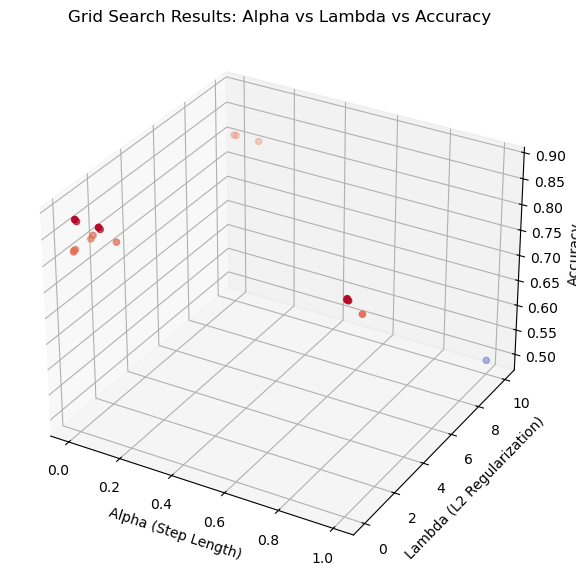

In [5]:
# EXTRAA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Generate synthetic dataset
X, y = make_classification(n_samples=500, n_features=5, n_classes=2, n_informative=3, n_redundant=2, random_state=42)

# Convert labels from {0,1} to {-1,1} for logistic regression
y = 2 * y - 1

# Implement Logistic Regression with L2 Regularization and Gradient Descent
# Grid Search with K-Fold Cross-Validation
alphas = [0.001, 0.01, 0.1, 1]  # Step lengths
lambdas = [0.001, 0.01, 0.1, 1, 10]  # L2 Regularization parameters
k = 3  # K-Fold Cross-Validation

kf = KFold(n_splits=k, shuffle=True, random_state=42)
results = []

for alpha in alphas:
    for lambda_ in lambdas:
        fold_accuracies = []
        
        for train_index, val_index in kf.split(X):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]
            
            model = LogisticRegressionL2(alpha=alpha, lambda_=lambda_)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)
            
            accuracy = accuracy_score((y_val + 1) // 2, y_pred)
            fold_accuracies.append(accuracy)
        
        mean_accuracy = np.mean(fold_accuracies)
        results.append((alpha, lambda_, mean_accuracy))

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results, columns=["Alpha", "Lambda", "Accuracy"])

# Find the best hyperparameters
best_params = results_df.loc[results_df["Accuracy"].idxmax()]
best_alpha, best_lambda, best_accuracy = best_params["Alpha"], best_params["Lambda"], best_params["Accuracy"]

# Plot the 3D grid search results
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(results_df["Alpha"], results_df["Lambda"], results_df["Accuracy"], c=results_df["Accuracy"], cmap="coolwarm", marker='o')

ax.set_xlabel("Alpha (Step Length)")
ax.set_ylabel("Lambda (L2 Regularization)")
ax.set_zlabel("Accuracy")
ax.set_title("Grid Search Results: Alpha vs Lambda vs Accuracy")

plt.show()

# Train final model with best hyperparameters on full training data
final_model = LogisticRegressionL2(alpha=best_alpha, lambda_=best_lambda)
final_model.fit(X, y)
y_final_pred = final_model.predict(X)

# Compute final accuracy
final_accuracy = accuracy_score((y + 1) // 2, y_final_pred)

# Display results
final_results_df = pd.DataFrame({
    "Hyperparameter": ["Best Alpha", "Best Lambda", "Final Accuracy"],
    "Value": [best_alpha, best_lambda, final_accuracy]
})

In [6]:
final_results_df

,Hyperparameter,Value
0,Best Alpha,0.010
1,Best Lambda,0.001
2,Final Accuracy,0.874


In [ ]:
# Import Necessary Libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Encode categorical variables : type_of_meal_plan, room_type_reserved, and market_segment_type using one-hot encoding.
df = pd.get_dummies(df, columns=['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], drop_first=True)

scaler = StandardScaler()
df[['lead_time', 'avg_price_per_room']] = scaler.fit_transform(df[['lead_time', 'avg_price_per_room']])
X = df.drop(['booking_status'], axis=1)
y = df['booking_status']

### Task 3: Implementing K-Fold Cross Validation

1. Initialize a KFold cross-validator with 7 splits.
2. Perform k-fold cross-validation using Naive Bayes and calculate the average accuracy.
3. Perform k-fold cross-validation using a Logistic Regression and calculate the average accuracy.
4. Perform k-fold cross-validation using a decision tree classifier and calculate the average accuracy.

In [ ]:

# Initialize KFold with 7 splits.
kf = KFold(n_splits=7, shuffle=True, random_state=42)

# Cross validation with Naive Bayes
nb_model = GaussianNB()
nb_cv_score = cross_val_score(nb_model, X, y, cv=kf, scoring="accuracy")
print("Naive Bayes Cross-Validation Accuracy: ", nb_cv_score.mean())

# Cross validation with Logistic Regression
lr_model = LogisticRegression()
lr_cv_score = cross_val_score(lr_model, X, y, cv=kf, scoring="accuracy")
print("Logistic Regression Cross-Validation Accuracy: ", lr_cv_score.mean())

# Cross validation with Decision Tree
dt_model = DecisionTreeClassifier()
dt_cv_score = cross_val_score(dt_model, X, y, cv=kf, scoring="accuracy")
print("Decision Tree Cross-Validation Accuracy: ", dt_cv_score.mean())


###Implementing Stratified K-Fold Cross Validation

# Initialize a StratifiedKFold cross-validator with 7 splits
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform stratified k-fold cross-validation using Naive Bayes
nb_skf_score = cross_val_score(nb_model, X, y, cv=skf, scoring="accuracy")
print("Naive Bayes Stratified Cross-Validation Accuracy: ", nb_skf_score.mean())

### Task 5: Implementing Grid Search CV

1. Initialize GridSearchCV with Naive Bayes and Random Forest:
    - Naive Bayes: var_smoothing [1e-9, 1e-8, 1e-7]
    - Random Forest: n_estimators [10, 50, 100], max_depth [5, 10, 15]
<br></br>
2. Fit GridSearchCV with Naive Bayes and Random Forest, and find the best parameters.
3. Print the best parameters for each model.

In [ ]:
# Initialize GridSearchCV with Naive Bayes and Random Forest 
model_params = {
    'naive_bayes': {
        'model': GaussianNB(),
        'params' : {
            'var_smoothing': [1e-9, 1e-8, 1e-7]
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [10, 50, 100],
            'max_depth': [5, 10, 15]          
        }
    }
}

# Fit GridSearchCV with Naive Bayes and Random Forest, and find the best parameters.
scores = []
for key, val in model_params.items():
    clf = GridSearchCV(
        val['model'],
        val['params'],
        cv=7,
        return_train_score=False
    )
    clf.fit(X, y)
    scores.append({
        'model': key,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })


# Print the best parameters for each model.
df_scores = pd.DataFrame(scores, columns=["model", "best_score", "best_params"])
df_scores


# Initialize RandomizedSearchCV and fit with RandomForest model
clf = RandomizedSearchCV(
    RandomForestClassifier(),
    {'n_estimators': [10, 50, 100], 'max_depth': [5, 10, 15, 20]},
    cv=7,
    return_train_score=False,
    n_iter=3
)
clf.fit(X, y)

# Print Best Parameters
print("Best Parameters for Random Forest (RandomizedSearchCV): ", clf.best_params_)
df = pd.DataFrame(clf.cv_results_)
df

### 3 Coordinate Descent for L1-Regularized Linear Regression

#### A. L1-Regularized Linear Regression

In [360]:
df1 = pd.read_csv('regression2.csv')
df1.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,y
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.068678,0.419500,0.998859,0.210385,10.042597
1,-0.234137,1.579213,0.767435,-0.469474,0.542560,-0.369752,0.588956,-0.452418,0.433443,-6.907481
2,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,0.215827,0.058546,-0.941923,1.002438,-11.705652
3,-0.562288,-1.012831,0.314247,-0.908024,-1.412304,0.569502,0.098751,-0.788289,0.880582,-4.990023
4,1.465649,-0.225776,0.067528,-1.424748,-0.544383,-0.330909,0.004560,-0.989354,0.434624,-2.982742


In [399]:
train_data2, test_data2 = train_test_split(df1)

Xtrain2 = train_data2.drop('y', axis=1)
Ytrain2 = train_data2['y']
Xtrainn2 = (Xtrain2 - Xtrain2.mean())/Xtrain2.std()
Ytrainn2 = (Ytrain2 - Ytrain2.mean())/Ytrain2.std()


Xtests2 = test_data2.drop('y', axis=1)
Ytests2 = test_data2['y'].astype(float)
Xtestss2 = (Xtests2 - Xtests2.mean())/Xtests2.std()
Ytestss2 = (Ytests2 - Ytests2.mean())/Ytests2.std()

In [453]:
def mean_square_loss(x,y,theta,lambda_):
    predictions = np.dot(x, theta)
    loss = np.mean((y - predictions) ** 2)
    loss+= (lambda_) * np.sum(np.abs(theta))
    return loss

def mean_square_gradient(x,y,theta,lambda_):
    predictions = np.dot(x, theta)
    gradient = -2 * np.dot(x.T, (y - predictions)) / len(y)
    gradient+= lambda_ * np.sign(theta)
    return gradient    


def sgd(x,y,theta, lr, epochs, batch_size, loss_trajectory):
    n_samples = x.shape[0]
    for epoch in range(epochs):

        indices = np.arange(n_samples)
        np.random.shuffle(indices)
        
        for i in range(0, n_samples, batch_size):
            batch_indices = indices[i:i + batch_size]
            x_batch = x[batch_indices]
            y_batch = y[batch_indices]
                
            predictions = np.dot(x_batch, theta)
            gradient = mean_square_gradient(x_batch,y_batch,theta,lambda_)
            theta -= lr * gradient
                #print('Updated theta:', theta)

            # Calculate loss for monitoring
        loss = mean_square_loss(x,y,theta,lambda_)
            
        loss_trajectory.append(loss)
            
    return theta,loss_trajectory

lambda_ = 0.5
Xtrainns2 = np.array(Xtrainn2)  # Convert Xtrainn to a NumPy array if it's a DataFrame
Ytrains2 = np.array(Ytrainn2)
theta = np.zeros(Xtrainns2.shape[1])

In [454]:
ttheta,traj = sgd(Xtrainns2,Ytrains2,theta, lr=0.01, epochs=150, batch_size=20, loss_trajectory=[])
predictionss = np.dot(Xtrain2, ttheta)
print('Optimum Theta after iterations are :', ttheta)

Optimum Theta after iterations are : [ 0.20284814 -0.05139114  0.01080433  0.48773802 -0.00337104  0.00531932
  0.00295894  0.03459513 -0.00196837]


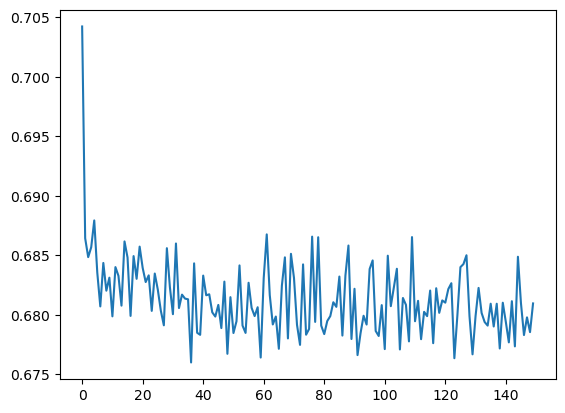

In [455]:
plt.plot(traj)

In [456]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(Ytrains2, predictionss)
print("R-squared (R2):", r2)

R-squared (R2): 0.7005693847824108


#### B. Coordinate Descent

In [511]:

def soft_threshold(beta, reg):
 
    if beta < reg:
        return beta + reg
    elif beta > reg:
        return beta - reg
    else:
        return 0

# Coordinate Descent algorithm for Lasso regression
def coordinate_descent(x, y, lambda_, epochs):
    m_train, n_features = np.shape(x)
    beta = np.zeros(n_features).reshape(-1, 1)  
    beta_hist = np.zeros((epochs + 1, n_features))  # To track the evolution of coefficients
    
    # Coordinate descent loop
    for j in range(epochs):
        for i in range(n_features):
            
            # Choosing the feature (coordinate) to update
            _x = x[:, i]
            x_coor = np.delete(x, i, axis=1)  # All features except i-th
            beta_coor = np.delete(beta, i, axis=0)  # All coefficients except i-th
            
            # Compute the linear part of the update
            col = x_coor.dot(beta_coor)  
            num = ((y - col).T).dot(_x)  # Numerator
            den = _x.T.dot(_x)  # Denominator
            update = num / den  
            
            # Apply soft-thresholding for L1 regularization (Lasso)
            reg = lambda_ / (_x.T.dot(_x))  # Regularization term
            update = soft_threshold(np.mean(update), reg)  # Apply soft-thresholding
            
            # the update should be scalar(I think..), and then update the coefficient
            beta[i] = update
            
        # Store the coefficients after each epoch
        beta_hist[j + 1] = beta.ravel() 
    
    return beta, beta_hist

lambda_ = 0.7  
epochs = 500  

beta, beta_hist = coordinate_descent(Xtrainns2, Ytrains2, lambda_, epochs)

# The final coefficients are in `beta` while `beta_hist` tracks the evolution of the coefficients
print("Final coefficients:", beta)
#rint(beta_hist)


Final coefficients: [[0.00083667]
 [0.00088599]
 [0.00090127]
 [0.00065628]
 [0.00078307]
 [0.00093803]
 [0.00100089]
 [0.00036851]
 [0.00083157]]


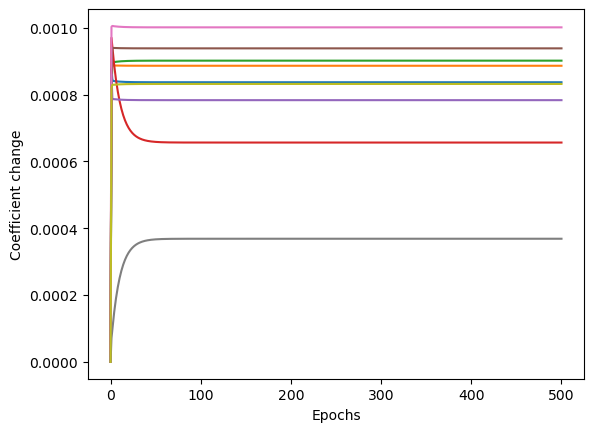

In [512]:
plt.plot(beta_hist)
plt.xlabel('Epochs')
plt.ylabel('Coefficient change')
plt.show()